# Milestone 2 Phase 1

Holla.. Irpan Habibi's here from Batch 004 Hacktiv8's Fulltime Data Science Programs

## Problem

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus.

## Import Necessary Libraries and Data Sets

In [1]:
# Import Libraries

from collections import Counter

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset

df = pd.read_csv('fetal_health.csv')

## Exploratory Data Analysis

In [3]:
# preview dataset

df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
# View dimensions of dataset

df.shape

(2126, 22)

Property `DataFrame.shape` returns a tuple representing the dimensionality of the DataFrame.

In [5]:
# View column names

cols = df.columns
print(f"Dataset Columns:\n{cols}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [6]:
# View summaries of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

`DataFrame.info()` method prints a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.



In [7]:
# Analyse statically insight of data

df.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

`DataFrame.describe()` method generates descriptive statistics for only numeric values not for categorical values. This method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Now, let's understand the statistics that are generated by the `describe()` method:

Count tells us the number of NoN-empty rows in a feature. As we can see there are no NoN-empty rows.
Mean tells us the mean value of that feature.
Std tells us the Standard Deviation Value of that feature.
Min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
Max tells us the maximum value of that feature.

In [8]:
# view duplicates data

df_duplicated = df[df.duplicated()]
df_duplicated

baseline value  accelerations  fetal_movement  uterine_contractions  \
68             140.0          0.007           0.000                 0.004   
234            123.0          0.000           0.000                 0.000   
306            145.0          0.000           0.020                 0.000   
324            135.0          0.000           0.000                 0.000   
333            144.0          0.000           0.019                 0.000   
787            123.0          0.003           0.003                 0.000   
791            123.0          0.003           0.004                 0.000   
798            146.0          0.000           0.000                 0.003   
849            138.0          0.002           0.000                 0.004   
1113           122.0          0.000           0.000                 0.000   
1114           122.0          0.000           0.000                 0.000   
1115           122.0          0.000           0.000                 0.000   
1458           148.0          0.005           0.000                 0.002   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
68                    0.0                   0.0                       0.0   
234                   0.0                   0.0                       0.0   
306                   0.0                   0.0                       0.0   
324                   0.0                   0.0                       0.0   
333                   0.0                   0.0                       0.0   
787                   0.0                   0.0                       0.0   
791                   0.0                   0.0                       0.0   
798                   0.0                   0.0                       0.0   
849                   0.0                   0.0                       0.0   
1113                  0.0                   0.0                       0.0   
1114                  0.0                   0.0                       0.0   
1115                  0.0                   0.0                       0.0   
1458                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
68                               34.0                                   1.2   
234                              49.0                                   0.8   
306                              77.0                                   0.2   
324                              62.0                                   0.5   
333                              76.0                                   0.4   
787                              52.0                                   0.8   
791                              50.0                                   0.9   
798                              65.0                                   0.4   
849                              41.0                                   0.8   
1113                             19.0                                   1.9   
1114                             19.0                                   1.9   
1115                             19.0                                   1.9   
1458                             40.0                                   0.9   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
68                                                  0.0       ...   
234                                                 7.0       ...   
306                                                45.0       ...   
324                                                71.0       ...   
333                                                61.0       ...   
787                                                 2.0       ...   
791                                                 4.0       ...   
798                                                39.0       ...   
849                                                 8.0       ...   
1113                                               

In [9]:
dfc = df.copy()

dfc.drop_duplicates(inplace=True)

In [10]:
dfc.duplicated().sum()

0

In [11]:
# check missing value

dfc.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There are no missing values in this dataset, so we can do further exploration without handling missing values

In [12]:
#rename columns name

dfc.rename(columns={'baseline value':'baseline_value'},inplace=True)

In [13]:
cols= dfc.columns
print(f"Dataset Columns:\n{cols}")

Dataset Columns:
Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


**Univariate Analysis**

In [14]:
print('Frequency distribution of values:\n', dfc['fetal_health'].value_counts(), 
      '\nPercentage of frequency distribution of values:\n', dfc['fetal_health'].value_counts()/len(df))

Frequency distribution of values:
 1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64 
Percentage of frequency distribution of values:
 1.0    0.774224
2.0    0.137347
3.0    0.082314
Name: fetal_health, dtype: float64


Data visualizations of "**fetal_health**" column makes easier to understand the fetal state, and visualization also makes it easier to detect patterns of the fetal state (`Normal=1` , `Suspect=2`, `Pathological=3`).

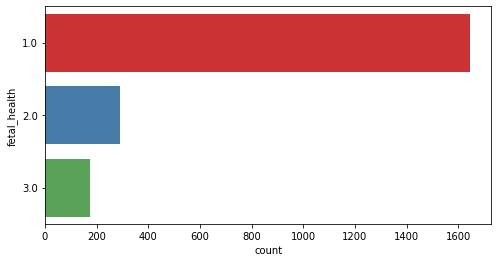

In [15]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="fetal_health", data=dfc, palette="Set1")
plt.show()

In [16]:
import plotly.express as px

vals = [len(dfc[dfc['fetal_health']==1.0]['fetal_health']), 
        len(dfc[dfc['fetal_health']==2.0]['fetal_health']), 
        len(dfc[dfc['fetal_health']==3.0]['fetal_health'])]
idx = ['Normal', 'Suspect', 'Pathological']
fig = px.pie(
    values=vals,
    names=idx,
    title='Fetal Health Percentage Distribution (Target Variable)',
    color_discrete_sequence=px.colors.sequential.Agsunset
)
fig.show()

**Bivariate Analysis**

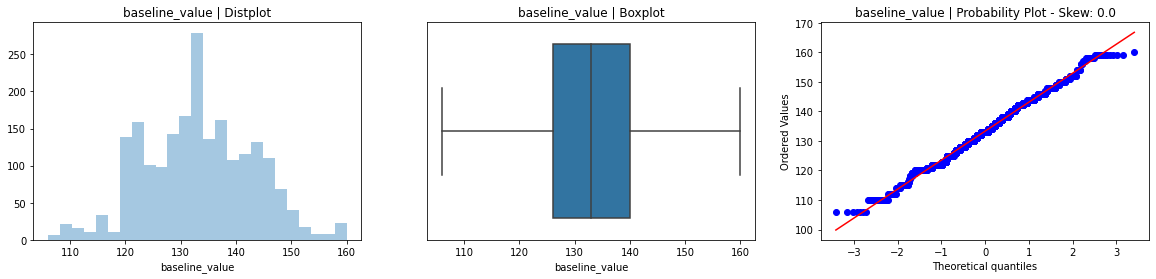

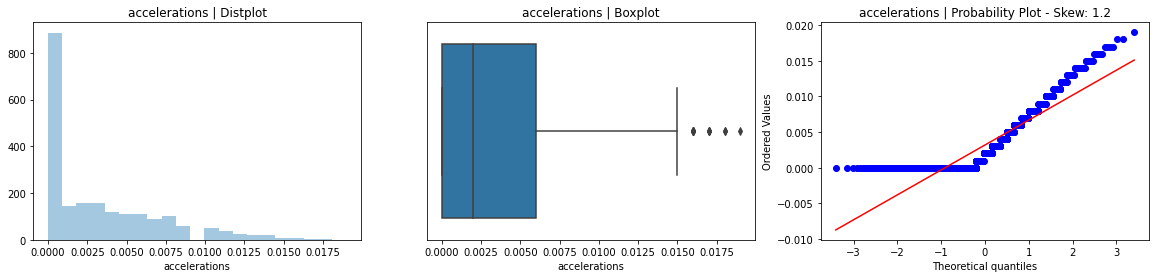

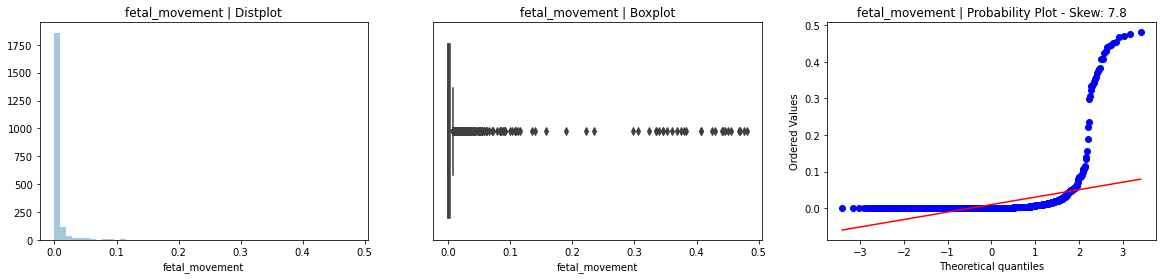

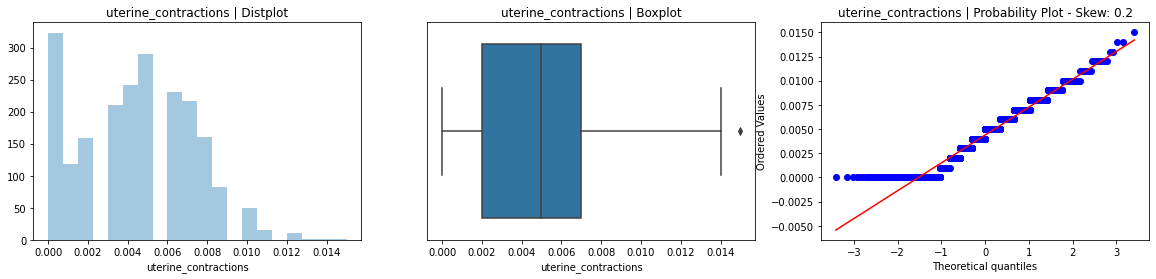

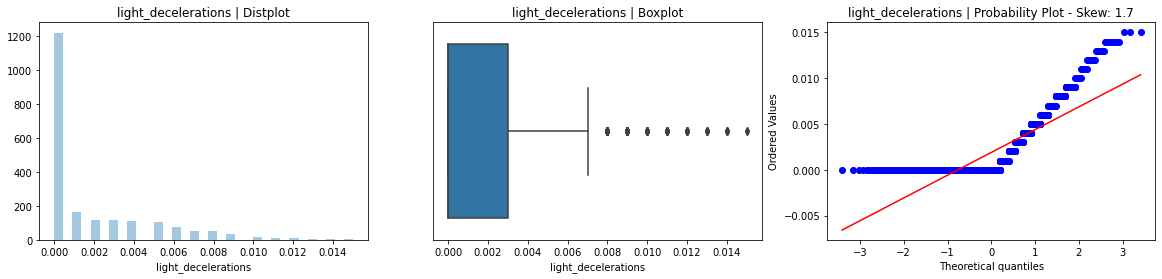

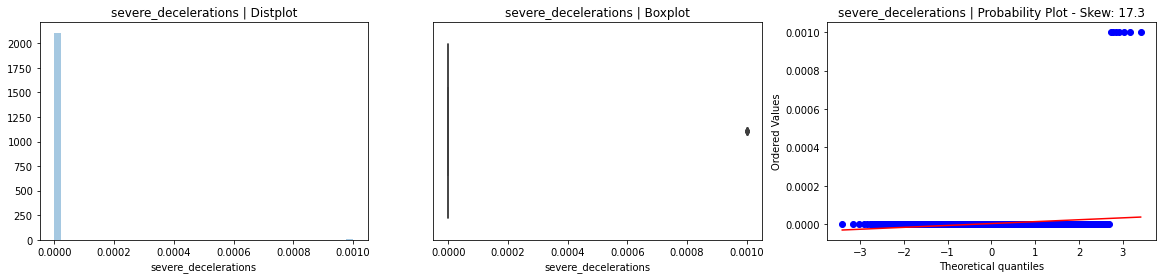

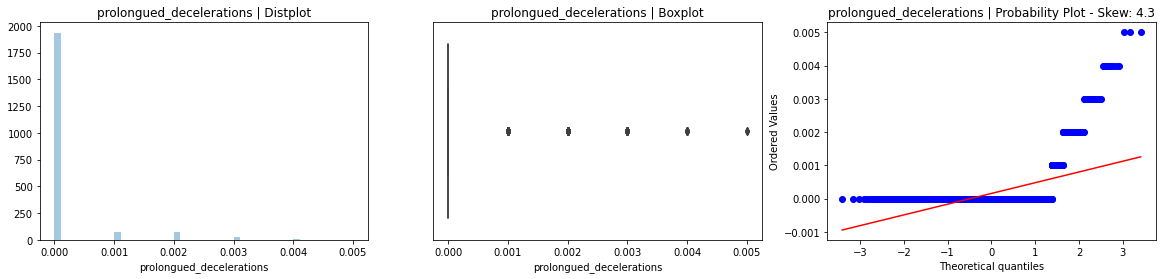

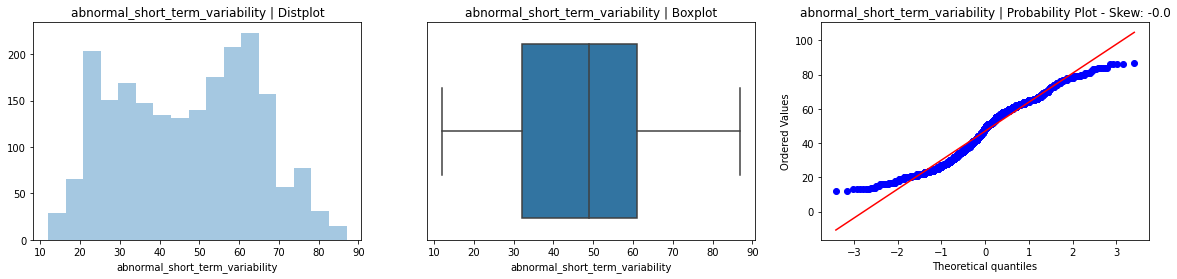

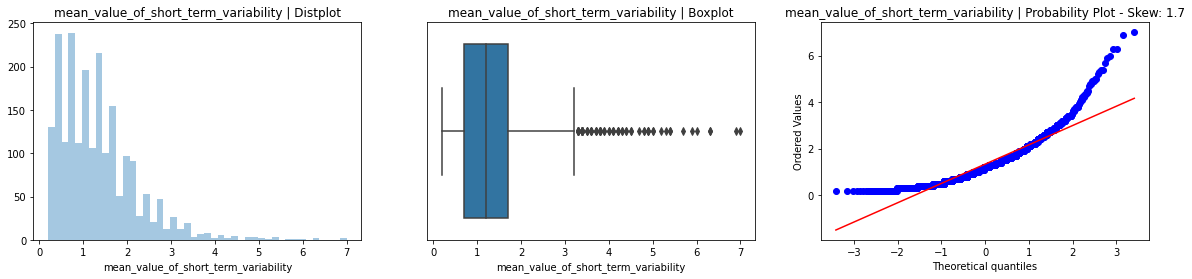

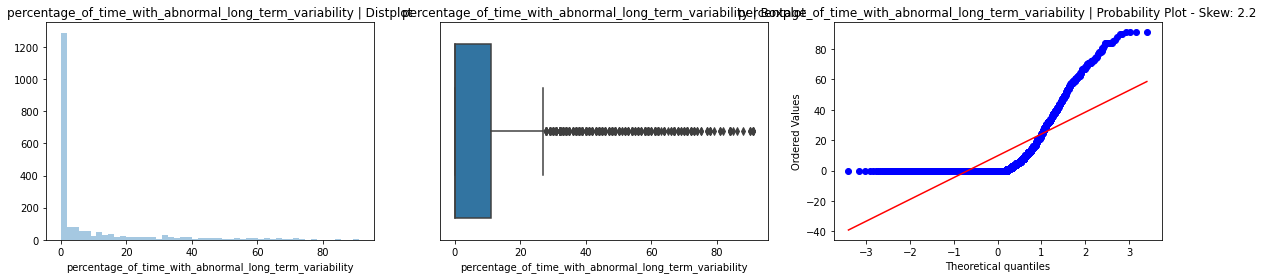

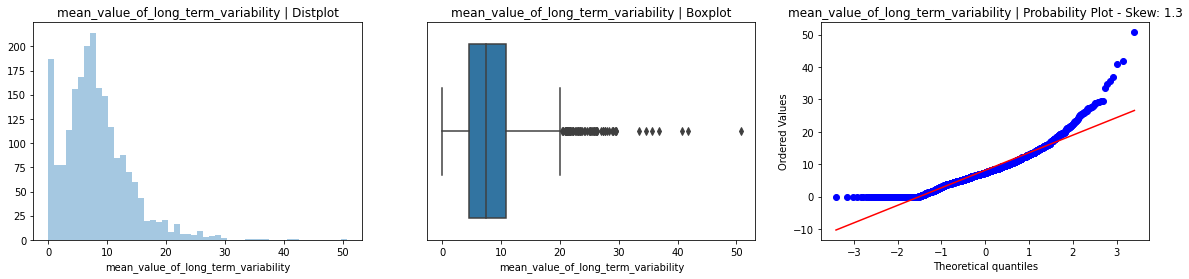

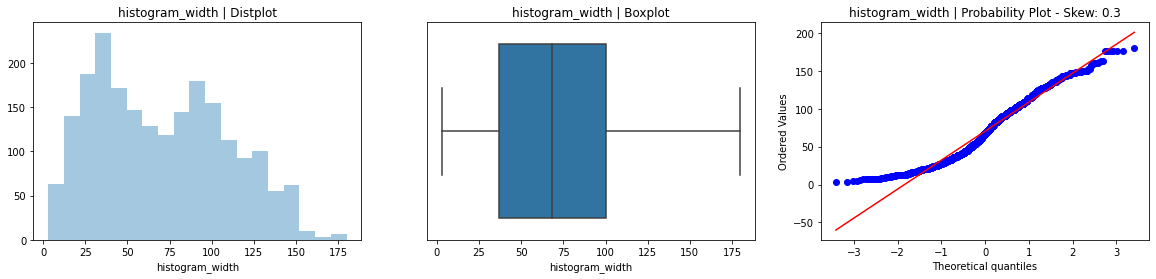

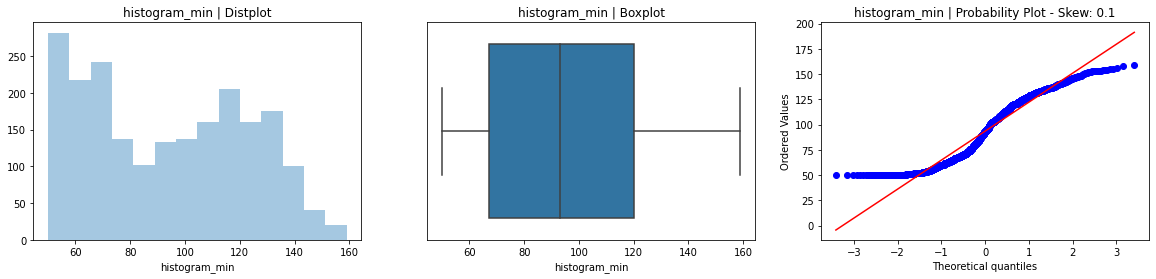

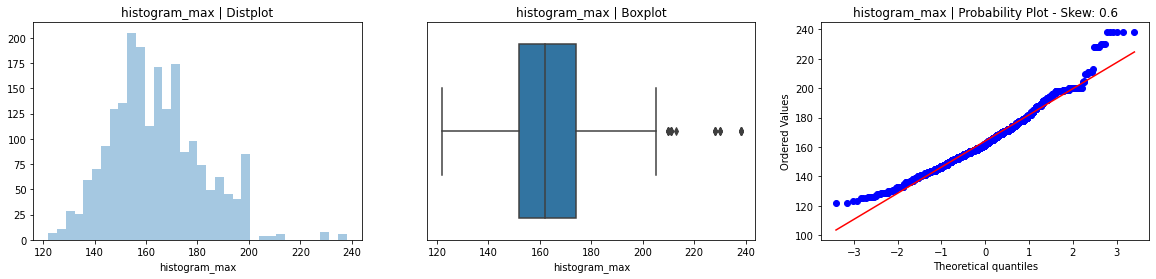

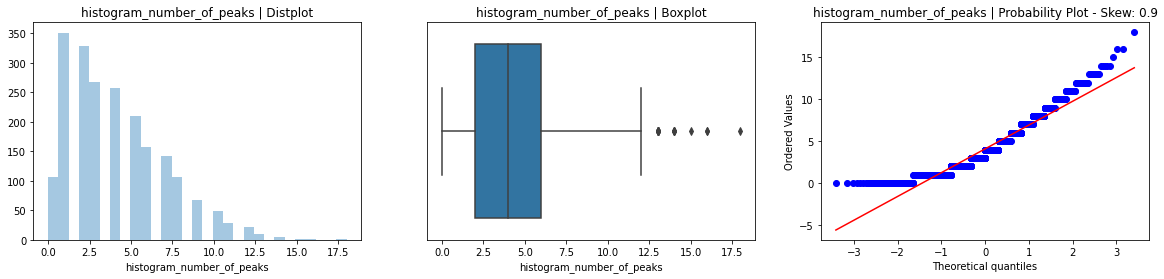

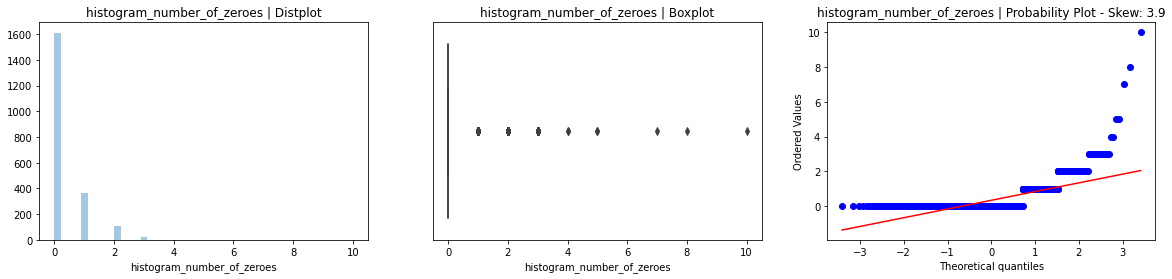

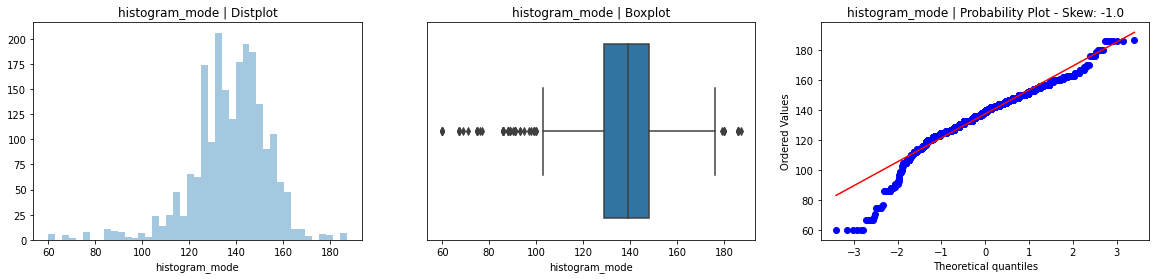

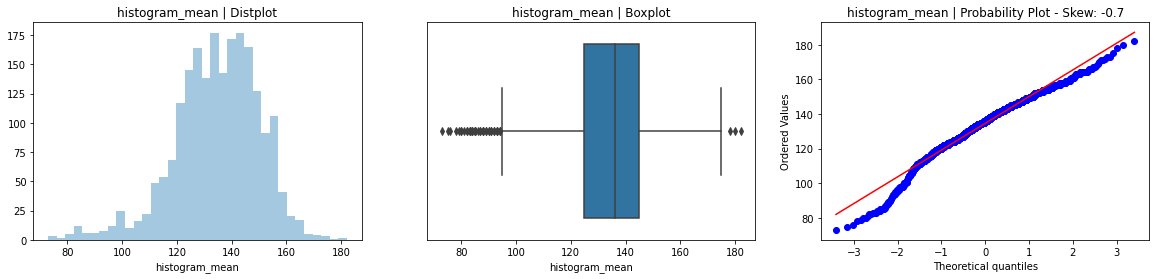

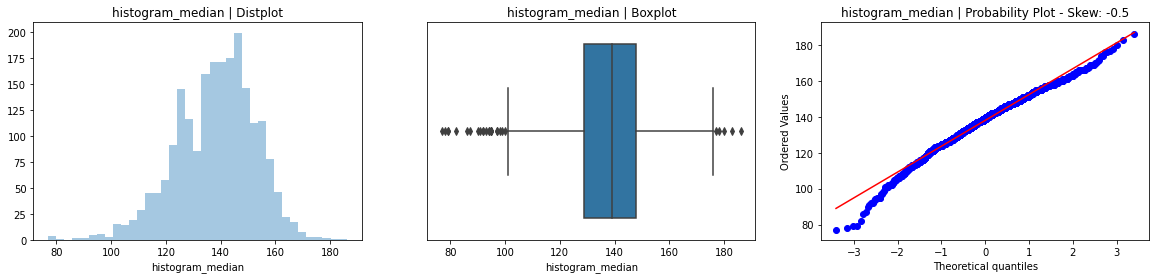

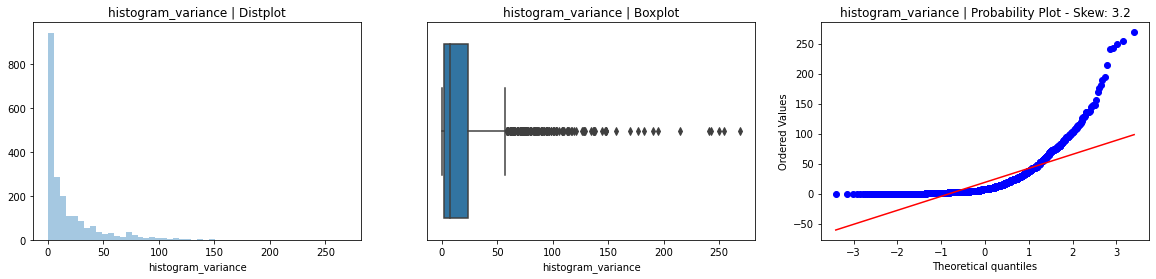

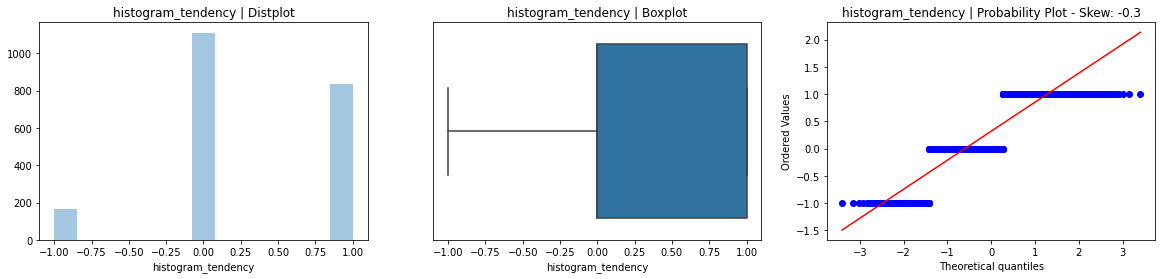

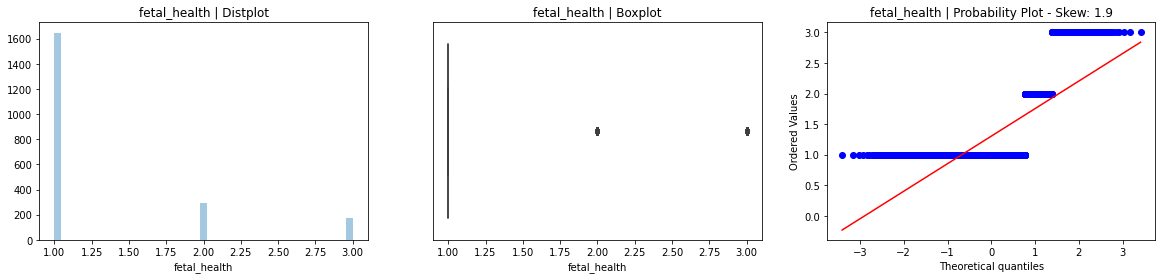

In [17]:
from scipy.stats import probplot,skew

for i in cols:
    fig, axes = plt.subplots(1, 3, figsize=(20,4))
    sns.distplot(dfc[i],kde=False, ax=axes[0])
    sns.boxplot(dfc[i], ax=axes[1])
    probplot(dfc[i], plot=axes[2])
    skew_val=round(dfc[i].skew(), 1)
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Distplot")
    axes[1].set_title(i + " | Boxplot")
    axes[2].set_title(i + " | Probability Plot - Skew: "+str(skew_val))
    plt.show()

The important things we could learn about the above plot is Skewness. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. There are three types of skewed distributions. A right (or positive) skewed distribution, left (or negative) skewed distribution, and normal distribution.

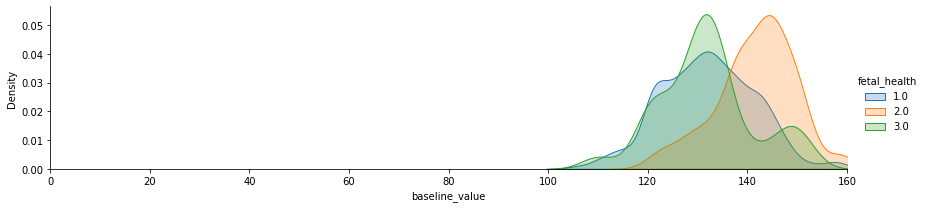

In [18]:
vs = sns.FacetGrid(dfc, hue='fetal_health', aspect=4)
vs.map(sns.kdeplot, 'baseline_value', shade=True)
vs.set(xlim=(0,dfc['baseline_value'].max()))
vs.add_legend()

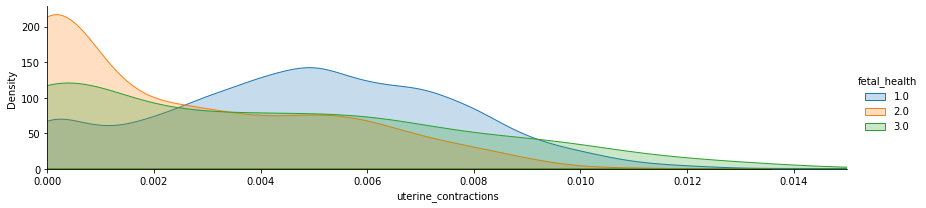

In [19]:
 vs = sns.FacetGrid(dfc, hue='fetal_health', aspect=4)
vs.map(sns.kdeplot, 'uterine_contractions', shade=True)
vs.set(xlim=(0,dfc['uterine_contractions'].max()))
vs.add_legend()

**Correlation Numeric featurs with output variable(fetal_health)**

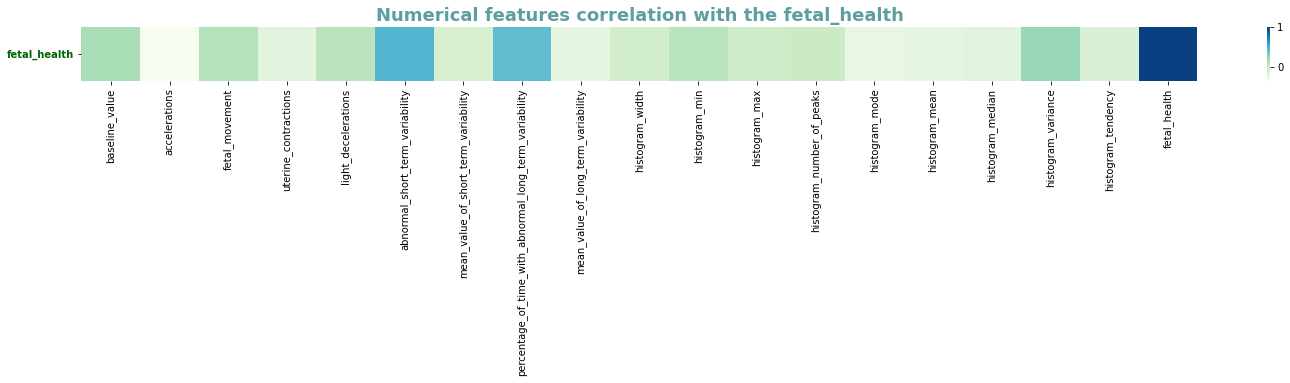

In [20]:
numeric = dfc.drop(columns=['severe_decelerations',
                   'prolongued_decelerations',
                   'histogram_number_of_zeroes'],axis=1)
numeric_corr = numeric.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [21]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

**Correlation using Heatmap**

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information. Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.

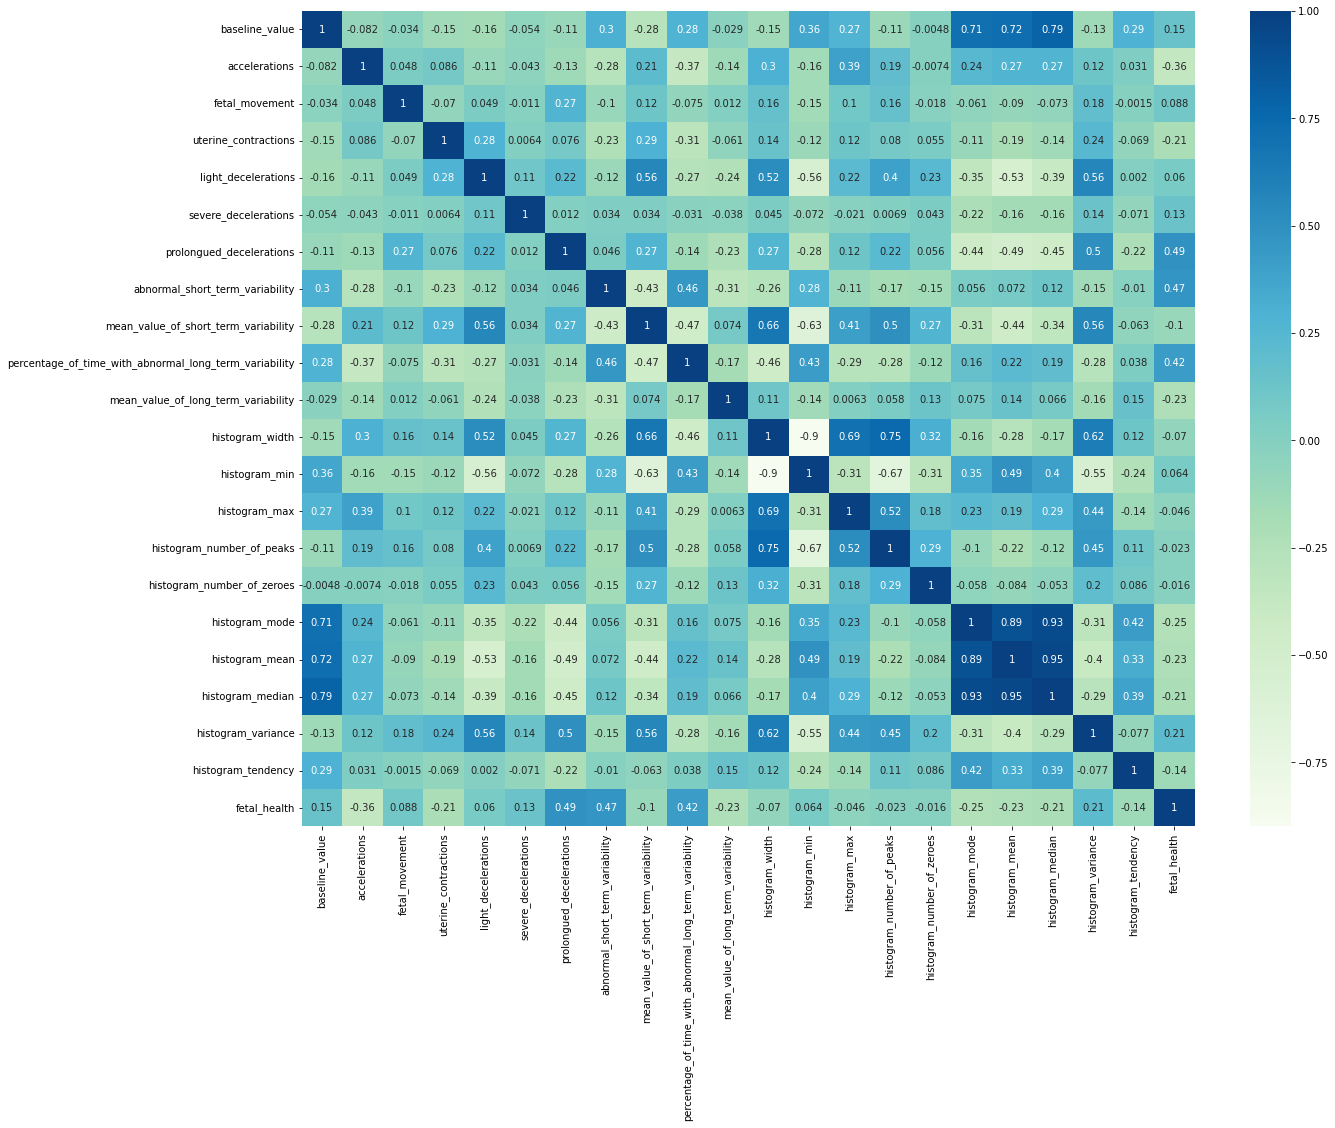

In [22]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(20,15))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(dfc.corr(), annot=True, cmap = "GnBu")

### Data Preprocessing

In [23]:
# Declare feature vector and target variable

X = dfc.drop(['fetal_health'],axis=1)
y = dfc['fetal_health']

X.shape, y.shape

((2113, 21), (2113,))

In [24]:
# Importing train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1479, 21), (634, 21), (1479,), (634,))

In [25]:
#scaling

features = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled= scaler.transform(X_test[features])

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=features)
X_train_scaled.head(3)

baseline_value  accelerations  fetal_movement  uterine_contractions  \
1551        1.617319      -0.830627       -0.208263              1.253380   
2057       -0.625450      -0.830627       -0.188052              0.565405   
467         1.107599      -0.830627       -0.167841             -0.810545   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1551            -0.644679             -0.063823                 -0.280097   
2057            -0.644679             -0.063823                 -0.280097   
467             -0.644679             -0.063823                 -0.280097   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1551                         0.709037                             -0.942313   
2057                         0.883766                             -0.718501   
467                          2.165111                             -1.166126   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1551                                           0.953869       ...   
2057                                           2.997187       ...   
467                                            1.174769       ...   

      histogram_width  histogram_min  histogram_max  \
1551        -1.436116       1.856581      -0.052628   
2057        -1.306595       0.902865      -1.350860   
467         -0.840319       1.311600       0.342486   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
1551                  -1.061044                   -0.459521        1.080466   
2057                  -1.061044                   -0.459521       -0.813417   
467                   -0.715005                   -0.459521        0.408443   

      histogram_mean  histogram_median  histogram_variance  histogram_tendency  
1551        1.252713          1.244892           -0.667362           -0.502171  
2057       -0.605368         -0.820463           -0.632038           -2.138096  
467         0.547924          0.487595           -0.667362           -2.138096  

[3 rows x 21 columns]

In [27]:
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=features)
X_test_scaled.head(3)

baseline_value  accelerations  fetal_movement  uterine_contractions  \
868         0.903711      -0.314777       -0.208263              0.909392   
1297       -1.848778       0.716923       -0.208263              0.909392   
770         0.088159      -0.830627       -0.208263             -1.498520   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
868             -0.644679             -0.063823                 -0.280097   
1297             0.392840             -0.063823                  1.301059   
770             -0.644679             -0.063823                 -0.280097   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
868                         -0.164608                             -0.718501   
1297                        -1.504197                              1.072001   
770                          1.932139                             -1.278032   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
868                                            1.782241       ...   
1297                                          -0.537200       ...   
770                                            4.433032       ...   

      histogram_width  histogram_min  histogram_max  \
868         -0.814415       0.868804      -0.334853   
1297         1.413347      -0.766137       1.810052   
770         -1.746967       1.345662      -1.576640   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
868                   -0.022929                   -0.459521        0.591722   
1297                  -0.368967                   -0.459521        0.469536   
770                   -1.061044                   -0.459521       -0.141394   

      histogram_mean  histogram_median  histogram_variance  histogram_tendency  
868         0.740139          0.694131           -0.632038            1.133755  
1297       -0.477224         -0.545082            3.818810           -0.502171  
770        -0.028722         -0.132011           -0.667362            1.133755  

[3 rows x 21 columns]

**Feature Importance**

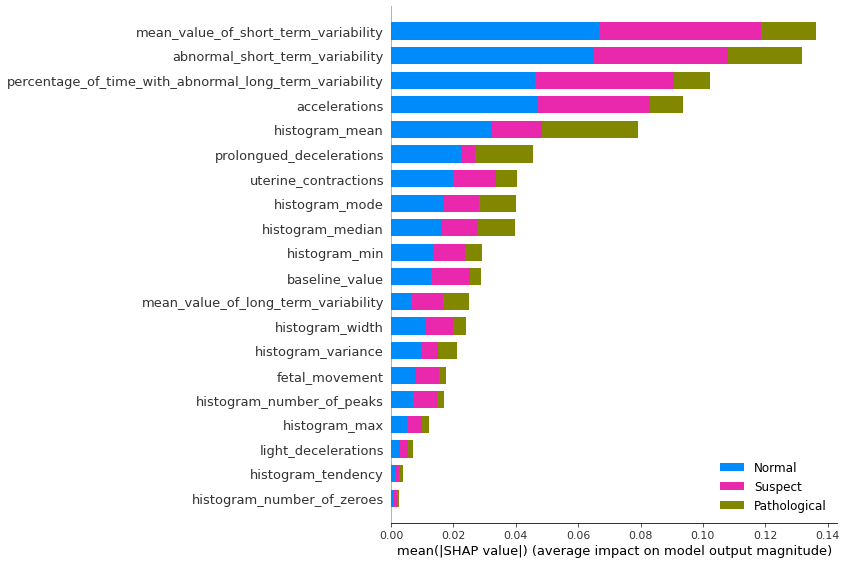

In [28]:
import shap
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)

classes=['Normal', 'Suspect', 'Pathological']

shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", class_names=classes)


## Building Machine Learning Models:

- Logistic Regression (LR)
- Random Forest Classifier(RF)
- XGBoost Classifier (XGB)

### Logistic Regression

In [29]:
# Baseline model of Logistic Regression with default parameters:

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
print(f"Baseline Logistic Regression: {round(logreg.score(X_test_scaled, y_test), 3)}")

pred_logreg = logreg.predict(X_test_scaled)

Baseline Logistic Regression: 0.894


Here, we are going to **tune** the baseline model to boost the model.

In [30]:
cv_method = StratifiedKFold(n_splits=3)

In [31]:
# Cross validate Logistic Regression model

scores_logreg = cross_val_score(logreg, X_train_scaled, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_logreg}")
print(f"CrossValMeans: {round(scores_logreg.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_logreg.std(), 3)}")


Scores(Cross validate) for Logistic Regression model:
[0.88438134 0.89655172 0.88438134]
CrossValMeans: 0.888
CrossValStandard Deviation: 0.006


**Model Performance Analysis**

- **Classification Report**: Report which includes Precision, Recall and F1-Score.

In [32]:
print("Classification Report")
print(classification_report(y_test, pred_logreg))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       494
         2.0       0.63      0.65      0.64        88
         3.0       0.93      0.73      0.82        52

    accuracy                           0.89       634
   macro avg       0.83      0.78      0.80       634
weighted avg       0.90      0.89      0.89       634



- **Confusion Matrix**: The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logreg))

Confusion Matrix:
[[472  22   0]
 [ 28  57   3]
 [  3  11  38]]


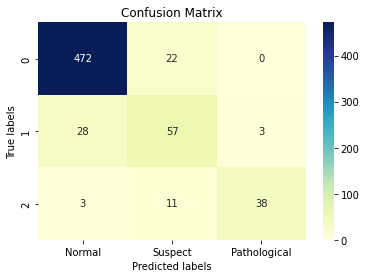

In [34]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logreg), annot=True, ax = ax, fmt='d', cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

### Gradient Boosting Classifier

In [35]:
# Baseline model of K-Nearest Neighbors with default parameters:

gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)
print(f"Baseline Gradient Boosting Classifier: {round(gbc.score(X_test_scaled, y_test), 3)}")

pred_gbc = gbc.predict(X_test_scaled)

Baseline Gradient Boosting Classifier: 0.953


Here, we are going to tune the baseline model to boost the model.

In [36]:
# Cross validate K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3)

scores_gbc = cross_val_score(gbc, X_train_scaled, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_gbc}")
print(f"CrossValMeans: {round(scores_gbc.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_gbc.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.92697769 0.93509128 0.94117647]
CrossValMeans: 0.934
CrossValStandard Deviation: 0.006


**Model Performance Analysis**

In [37]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       494
         2.0       0.89      0.76      0.82        88
         3.0       0.98      0.94      0.96        52

    accuracy                           0.95       634
   macro avg       0.94      0.90      0.92       634
weighted avg       0.95      0.95      0.95       634



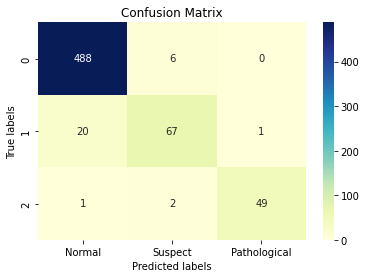

In [38]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, fmt='d', cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

### Random Forest Classifier

In [39]:
# Baseline model of RF with default parameters:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
print(f"Baseline Random Forest: {round(rf.score(X_test_scaled, y_test), 3)}")

pred_rf = rf.predict(X_test_scaled)

Baseline Random Forest: 0.95


In [40]:
# Cross validate Random forest model
scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_rf}")
print(f"CrossValMeans: {round(scores_rf.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_rf.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.92089249 0.93914807 0.93509128]
CrossValMeans: 0.932
CrossValStandard Deviation: 0.008


In [41]:
print("Classification Report")
print(classification_report(y_test, pred_rf))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       494
         2.0       0.90      0.75      0.82        88
         3.0       0.96      0.92      0.94        52

    accuracy                           0.95       634
   macro avg       0.94      0.89      0.91       634
weighted avg       0.95      0.95      0.95       634



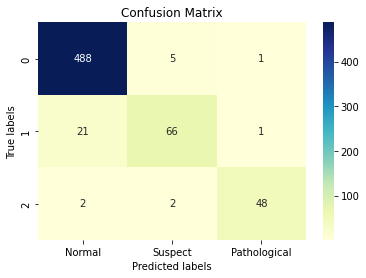

In [42]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, ax = ax, fmt='d', cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [43]:
# Plot learning curve
'''def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt'''

'def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,\n                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):\n    \n    plt.figure()\n    plt.title(title)\n    if ylim is not None:\n        plt.ylim(*ylim)\n        \n    plt.xlabel("Training examples")\n    plt.ylabel("Score")\n    train_sizes, train_scores, test_scores = learning_curve(\n        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)\n    train_scores_mean = np.mean(train_scores, axis=1)\n    train_scores_std = np.std(train_scores, axis=1)\n    test_scores_mean = np.mean(test_scores, axis=1)\n    test_scores_std = np.std(test_scores, axis=1)\n    plt.grid()\n\n    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\n                     train_scores_mean + train_scores_std, alpha=0.1,\n                     color="r")\n    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\n                     test_scores_mean + test_scores_std, alpha=0.1, color=

In [44]:
results = pd.DataFrame({
                        "Train Accuracy Mean": [logreg.score(X_train_scaled, y_train),
                                  gbc.score(X_train_scaled, y_train),
                                  rf.score(X_train_scaled, y_train),
                                    ],
                        "Test Accuracy Mean": [logreg.score(X_test_scaled, y_test),
                                  gbc.score(X_test_scaled, y_test),
                                  rf.score(X_test_scaled, y_test),
                                    ],
                        "Model": ["Logistic Regression",
                                  "Gradient Boosting Classifier",
                                  "Random Forest"
                                  ]
                        })
results = results.sort_values(by="Test Accuracy Mean", ascending=False)
results = results.set_index("Model")
results

Train Accuracy Mean  Test Accuracy Mean
Model                                                                
Gradient Boosting Classifier             0.995267            0.952681
Random Forest                            0.999324            0.949527
Logistic Regression                      0.903313            0.894322

### Stacking Models

In [45]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('logreg',LogisticRegression(random_state=42,multi_class='multinomial')),
    ('gbc', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42,class_weight='balanced_subsample'))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(random_state=42), cv=5
)

clf.fit(X_train_scaled, y_train)
print(f"Stacking Classifier Score: {round(clf.score(X_test_scaled, y_test), 3)}")

pred_clf = clf.predict(X_test_scaled)

Stacking Classifier Score: 0.948


In [46]:
print("Classification Report")
print(classification_report(y_test, pred_clf))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       494
         2.0       0.87      0.78      0.83        88
         3.0       0.98      0.92      0.95        52

    accuracy                           0.95       634
   macro avg       0.94      0.90      0.91       634
weighted avg       0.95      0.95      0.95       634



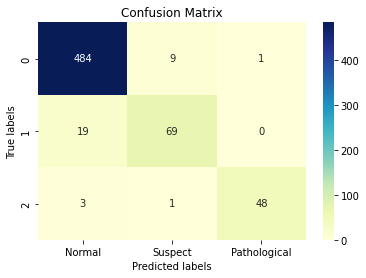

In [47]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_clf), annot=True, ax = ax, fmt='d', cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

### Hyperparams Tuning with GridSearchCV

**Random Forest Classifier**

In [48]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score

rf = RandomForestClassifier(random_state=42)

params = {
            "min_samples_split": [2, 6, 20],
            "min_samples_leaf": [1, 4, 16],
            "n_estimators" :[100,200,300,400],
            "criterion": ["gini"]             
         }
        

scorers = {
            'f1_score':make_scorer(f1_score,average='macro'),
            'f1_score_weighted':make_scorer(f1_score,average='weighted'),
            'precision_score': make_scorer(precision_score,average='macro'),
            'recall_score': make_scorer(recall_score,average='weighted'),
            'accuracy_score': make_scorer(accuracy_score)
          }

skf = StratifiedKFold(n_splits=2)

grid = GridSearchCV(rf, 
                    param_grid = params, 
                    scoring = scorers, 
                    n_jobs = -1, 
                    cv = skf.split(X_train_scaled, y_train),
                    refit = "f1_score_weighted")

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7ff4288dd200>,
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 200, 300, 400]},
             refit='f1_score_weighted',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'f1_score_weighted': make_scorer(f1_score, average=weighted),
                      'precision_score': make_scorer(precision_score, average=macro),
                      'recall_score': make_scorer(recall_score, average=weighted)})

In [49]:
best_params= grid.best_params_
best_model = grid.best_estimator_
best_params

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [50]:
rf_tuning = RandomForestClassifier(criterion= 'gini',
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators = 300,
                            random_state = 42)
rf_tuning.fit(X_train_scaled, y_train)
print(f"RF Test set score: {round(rf_tuning.score(X_test_scaled, y_test), 3)}")

pred_rf = rf_tuning.predict(X_test_scaled)

RF Test set score: 0.95


In [51]:
print("Classification Report")
print(classification_report(y_test, pred_rf))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       494
         2.0       0.89      0.75      0.81        88
         3.0       0.98      0.92      0.95        52

    accuracy                           0.95       634
   macro avg       0.94      0.89      0.91       634
weighted avg       0.95      0.95      0.95       634



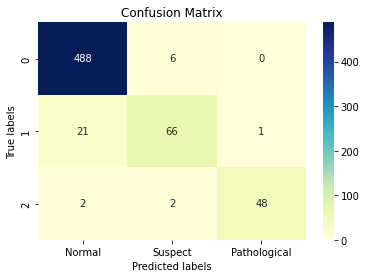

In [52]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, ax = ax, fmt='d', cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

**Gradient Boosting Classifier**

In [53]:
gbc = GradientBoostingClassifier(random_state=42)

params = {
            "loss": ["deviance"],
            "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
            "n_estimators": [250, 500],
            "max_depth": [3, 5, 8]
         }
        

scorers = {
            'f1_score':make_scorer(f1_score,average='macro'),
            'f1_score_weighted':make_scorer(f1_score,average='weighted'),
            'precision_score': make_scorer(precision_score,average='macro'),
            'recall_score': make_scorer(recall_score,average='weighted'),
            'accuracy_score': make_scorer(accuracy_score)
          }

skf = StratifiedKFold(n_splits=2)

grid = GridSearchCV(gbc, 
                    param_grid = params, 
                    scoring = scorers, 
                    n_jobs = -1, 
                    cv = skf.split(X_train_scaled, y_train),
                    refit = "f1_score_weighted")

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7ff427e59b30>,
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'n_estimators': [250, 500]},
             refit='f1_score_weighted',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'f1_score_weighted': make_scorer(f1_score, average=weighted),
                      'precision_score': make_scorer(precision_score, average=macro),
                      'recall_score': make_scorer(recall_score, average=weighted)})

In [54]:
best_params= grid.best_params_
best_model = grid.best_estimator_
best_params

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 500}

In [55]:
gbc = GradientBoostingClassifier(learning_rate = 0.1,
                                 loss = 'deviance',
                                 max_depth = 5, 
                                 n_estimators = 500,
                                 random_state = 42)
gbc.fit(X_train_scaled, y_train)
print(f"GBC Test Score: {round(gbc.score(X_test_scaled, y_test), 3)}")

pred_gbc = gbc.predict(X_test_scaled)

GBC Test Score: 0.951


In [56]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       494
         2.0       0.89      0.77      0.83        88
         3.0       0.94      0.94      0.94        52

    accuracy                           0.95       634
   macro avg       0.93      0.90      0.91       634
weighted avg       0.95      0.95      0.95       634



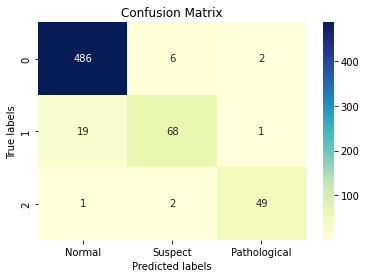

In [57]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, fmt='d', cmap='YlGnBu');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

### Final Model

In [58]:
#Define Model

model = GradientBoostingClassifier(learning_rate = 0.1,
                                 loss = 'deviance',
                                 max_depth = 5, 
                                 n_estimators = 500,
                                 random_state = 42)

#Train Model
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

In [59]:
#Model Saving

import joblib
joblib.dump(model, "model_clf.pkl") 
final_model_loaded = joblib.load("model_clf.pkl")

### Model Inference

In [60]:
dfc.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [61]:
new_data = [{'baseline_value':107, 'accelerations':0.018, 'fetal_movement':0.002,
       'uterine_contractions':0.005, 'light_decelerations':0.005, 'severe_decelerations':0.001,
       'prolongued_decelerations':0.002, 'abnormal_short_term_variability':66,
       'mean_value_of_short_term_variability':1,
       'percentage_of_time_with_abnormal_long_term_variability':56,
       'mean_value_of_long_term_variability':5.2, 'histogram_width':13,
       'histogram_min':63, 'histogram_max':171, 'histogram_number_of_peaks':2,
       'histogram_number_of_zeroes':10, 'histogram_mode':148, 'histogram_mean':112,
       'histogram_median':77, 'histogram_variance':7, 'histogram_tendency':1
      }]
new_data = pd.DataFrame(new_data,index=[1])
new_data

baseline_value  accelerations  fetal_movement  uterine_contractions  \
1             107          0.018           0.002                 0.005   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
1                0.005                 0.001                     0.002   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
1                               66                                     1   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
1                                                 56       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
1               13             63            171                          2   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1                          10             148             112   

   histogram_median  histogram_variance  histogram_tendency  
1                77                   7                   1  

[1 rows x 21 columns]

In [62]:
sample_cols = new_data.columns

new_sample = scaler.transform(new_data)
new_pred = model.predict(new_sample)
new_pred

array([2.])

## Overall Analysis



In this kernel I use data on CTGs test results that indicate fetal health. There are several variables that determine fetal health. Some of these variables include "baseline value","uterine_contractions", etc.  After the test using gtc there are three results that classify fetal health, namely normal, suspect and pathological. In this prediction, I focus on the health of the fetus which is classified as suspect and pathological. This is because the main purpose of the test is to reduce infant mortality in the womb.

On Exploratory Data Analysis, I also classify features to show that the variables related which abnormality, variability and fetal health are important features.

**Model Analysis**
1. Classifier models used are: 
 - Logistic Regression, 
 - Random Forest Classifier and 
 - Gradient Boodting Classifier
2. These three models have a fairly high score accuracy in the range of 90 percent when trained on data with default parameters.

3. When I evaluating the model with Random Forest algorithm and Gradient Boosting algorithm, it shows that the model indicated as **overfitting** to data train. Therefore, cross-validation of the train data is carried out.

4. After getting the scores from each model, I did a model stacking to see if there was an increase in the scores of the three models that had been trained. However, there is no improvement.

5. Next, to improve the performance of each model, I performed hyperparameter tuning on the two models with the highest scores, namely RF and GBC. And after tuning the two models showed an increase in performance but not significant.

6. For the final model, I chose to consider the recall value because it focused on making a model to predict the fetal health of a suspect and pathological. And the final model that I use is Gradient Boosting Classifier from the hyperparameter tuning results.